#### 코스피/코스닥 자료 출처: http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmd?menuId=MDC0201010105

## 1. 미국 금리 2019~2022 전처리

In [99]:
import pandas as pd
import platform
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

amDF=pd.read_csv('미국금리_월.csv',encoding='euc_kr')
amDF.head()

,날짜,실제,이전
0,2019-01-01,2.50%,2.25%
1,2019-02-01,2.50%,2.50%
2,2019-03-01,2.50%,2.50%
3,2019-04-01,2.50%,2.50%
4,2019-05-01,2.50%,2.50%


In [100]:
# 결측치 있는지 확인
amDF.isnull().sum()

날짜    0
실제    0
이전    0
dtype: int64

In [101]:
amDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      42 non-null     object
 1   실제      42 non-null     object
 2   이전      42 non-null     object
dtypes: object(3)
memory usage: 1.1+ KB


In [102]:
# 값만 따오고 싶어서 % 없애고 실수형으로 data 바꿔줌
amDF['실제']=amDF['실제'].apply(lambda x : x.replace('%','')).astype('float')

In [103]:
dateDF=amDF['날짜'].apply(lambda x : x.split('-')[:2]) # 연, 월, 일 분리 ('-' 기준)
dateDF=pd.DataFrame(dateDF.tolist(),columns=('연','월')) # list 형태로 바꾼 걸 다시 DF로 생성

In [104]:
# 연, 월, 일 분리한 DF에 원데이터 '실제' 컬럼 연결
amDF=pd.concat([dateDF,amDF['실제']],axis=1)
amDF.head()

,연,월,실제
0,2019,01,2.5
1,2019,02,2.5
2,2019,03,2.5
3,2019,04,2.5
4,2019,05,2.5


In [105]:
# 2019년 데이터
amDF_2019=amDF[amDF.연=='2019']
# 2020년 데이터
amDF_2020=amDF[amDF.연=='2020']
# 2021년 데이터
amDF_2021=amDF[amDF.연=='2021']
# 2022년 데이터
amDF_2022=amDF[amDF.연=='2022']
amDF_2019.head()

,연,월,실제
0,2019,01,2.5
1,2019,02,2.5
2,2019,03,2.5
3,2019,04,2.5
4,2019,05,2.5


In [106]:
# '연', '월' data 사이에 '-' 넣어서 저장해 주는 함수
def interest_rate(data):
    data['날짜']=data.apply(lambda x:str(x['연'])+'-'+x['월'],axis=1)
    data=data.iloc[:,2:]
    data.set_index('날짜',inplace=True)
    return data

In [107]:
amDF_2019=interest_rate(amDF_2019)
amDF_2020=interest_rate(amDF_2020)
amDF_2021=interest_rate(amDF_2021)
amDF_2022=interest_rate(amDF_2022)

In [109]:
amDF_total=pd.concat([amDF_2019,amDF_2020,amDF_2021,amDF_2022])
amDF_total.head()

,실제
날짜,
2019-01,2.5
2019-02,2.5
2019-03,2.5
2019-04,2.5
2019-05,2.5


In [186]:
# 금리 ,코스피, 코스닥 그래프 그리는 함수
def draw_graph(data,name):    
    if(platform.system()=='Windows'):
        plt.rc('font',family='Malgun Gothic')
    else:
        plt.rc('font',family='AppleGothic')       
    plt.rcParams['axes.unicode_minus']=False
    plt.figure(figsize=(20,10))
    plt.title('2019~2022년 {}'.format(name),size=20)
    plt.plot(data,'orange',marker='o',label=name+' 2019~2022')
    plt.xticks(data.index,rotation=60,size=12)
    plt.xlabel('기간',size=15)
    if name=='미국 금리': plt.ylabel('금리',size=15)
    else: plt.ylabel('종가',size=15)
    plt.legend(fontsize=13)
    plt.show()

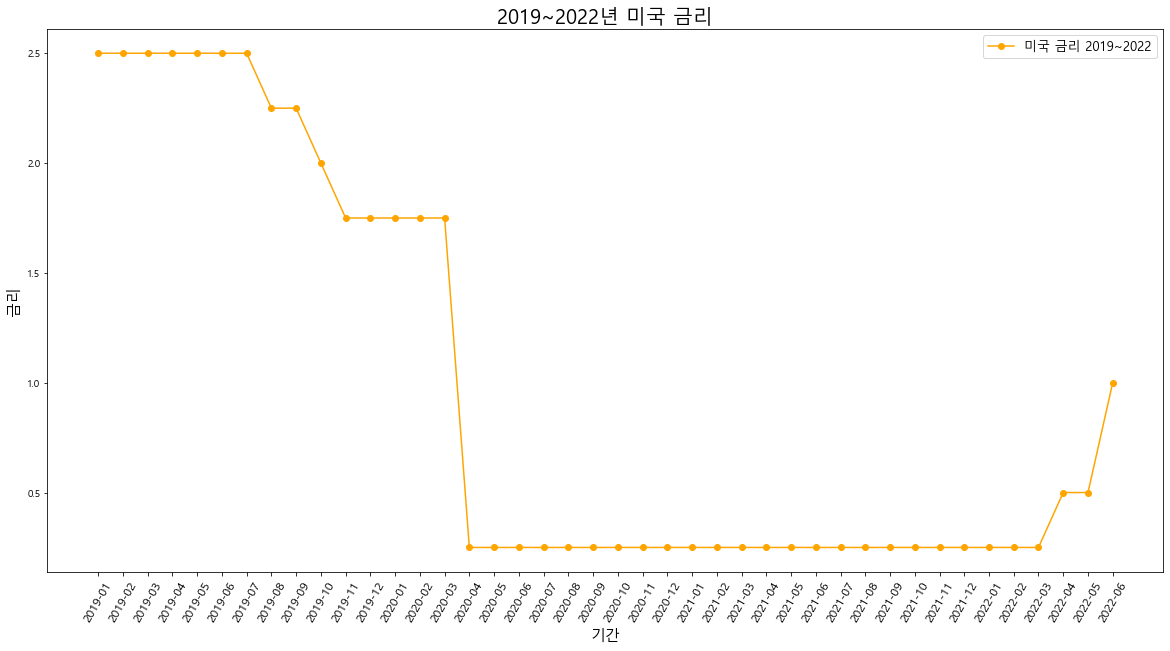

In [187]:
# 미국 금리 그래프
draw_graph(amDF_total,'미국 금리')

## 2. KOSPI 데이터 2019~2022 전처리

In [110]:
kospiDF=pd.read_csv('KOSPI2019~2022.csv',encoding='euc_kr')
kospiDF.head()

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액
0,2022/06/30,2332.64,-45.35,-1.91,2368.57,2368.57,2332.59,515396.0,8923481.0,1.835493e+09
1,2022/06/29,2377.99,-44.10,-1.82,2387.10,2393.25,2375.45,422127.0,7965810.0,1.871276e+09
2,2022/06/28,2422.09,20.17,0.84,2405.20,2422.10,2393.96,564986.0,7193434.0,1.906215e+09
3,2022/06/27,2401.92,35.32,1.49,2383.20,2418.94,2365.86,510587.0,7656358.0,1.890526e+09
4,2022/06/24,2366.60,52.28,2.26,2327.11,2373.48,2319.99,654446.0,8469156.0,1.862321e+09


In [111]:
# 결측치 있는지 확인
kospiDF.isnull().sum()

일자        0
종가        0
대비        0
등락률       0
시가        0
고가        0
저가        0
거래량       0
거래대금      0
상장시가총액    0
dtype: int64

In [112]:
dateDF1=kospiDF['일자'].apply(lambda x : x.split('/')[:3]) # 연, 월, 일 분리 ('/' 기준)
dateDF1=pd.DataFrame(dateDF1.tolist(),columns=('연','월','일')) # list 형태로 바꾼 걸 다시 DF로 생성

In [113]:
# 연, 월, 일 분리한 DF에 원데이터 '종가' 컬럼 연결
kospiDF=pd.concat([dateDF1,kospiDF['종가']],axis=1)
kospiDF.head()

,연,월,일,종가
0,2022,06,30,2332.64
1,2022,06,29,2377.99
2,2022,06,28,2422.09
3,2022,06,27,2401.92
4,2022,06,24,2366.60


In [114]:
# 2019년 데이터
kospiDF_2019=kospiDF[kospiDF.연=='2019']
# 2020년 데이터
kospiDF_2020=kospiDF[kospiDF.연=='2020']
# 2021년 데이터
kospiDF_2021=kospiDF[kospiDF.연=='2021']
# 2022년 데이터
kospiDF_2022=kospiDF[kospiDF.연=='2022']
kospiDF_2019.head()

,연,월,일,종가
617,2019,12,30,2197.67
618,2019,12,27,2204.21
619,2019,12,26,2197.93
620,2019,12,24,2190.08
621,2019,12,23,2203.71


In [115]:
# 년도-월마다 평균
kospiDF_2019_mean=kospiDF_2019.groupby(by=['월']).mean()
kospiDF_2020_mean=kospiDF_2020.groupby(by=['월']).mean()
kospiDF_2021_mean=kospiDF_2021.groupby(by=['월']).mean()
kospiDF_2022_mean=kospiDF_2022.groupby(by=['월']).mean()

In [116]:
# 코스피, 코스닥 둘 다 연도 붙여서 쓰려고 함수 만듦
def stock_year_mean(data,year):
    data['연']=year
    data=data.reset_index()
    data['날짜']=data.apply(lambda x:str(x['연'])+'-'+x['월'],axis=1)
    data=data.set_index('날짜')['종가']
    return data

In [117]:
kospiDF_2019_mean=stock_year_mean(kospiDF_2019_mean,2019)
kospiDF_2020_mean=stock_year_mean(kospiDF_2020_mean,2020)
kospiDF_2021_mean=stock_year_mean(kospiDF_2021_mean,2021)
kospiDF_2022_mean=stock_year_mean(kospiDF_2022_mean,2022)

In [118]:
kospiDF_total_mean=pd.concat([kospiDF_2019_mean,kospiDF_2020_mean,kospiDF_2021_mean,kospiDF_2022_mean])
kospiDF_total_mean.head()

날짜
2019-01    2101.984091
2019-02    2210.198824
2019-03    2161.914500
2019-04    2212.120455
2019-05    2086.898095
Name: 종가, dtype: float64

In [172]:
# # 코스피 그래프
# draw_graph(kospiDF_total_mean,'KOSPI')

## 3. KOSDAQ 데이터 2019~2022 전처리

In [119]:
kosdaqDF=pd.read_csv('KOSDAQ2019~2022.csv',encoding='euc_kr')
kosdaqDF.head()

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액
0,2022/06/30,745.44,-16.91,-2.22,762.45,762.45,744.24,910029.0,6318523.0,325164482.0
1,2022/06/29,762.35,-7.16,-0.93,759.21,765.79,753.32,819568.0,5970952.0,331666597.0
2,2022/06/28,769.51,-1.09,-0.14,770.69,774.80,759.83,978287.0,6455444.0,334683635.0
3,2022/06/27,770.60,20.30,2.71,758.00,774.57,754.62,893324.0,6699471.0,334545525.0
4,2022/06/24,750.30,35.92,5.03,719.47,750.41,719.47,837119.0,6287370.0,334693540.0


In [120]:
# 결측치 있는지 확인
kosdaqDF.isnull().sum()

일자        0
종가        0
대비        0
등락률       0
시가        0
고가        0
저가        0
거래량       0
거래대금      0
상장시가총액    0
dtype: int64

In [121]:
dateDF2=kosdaqDF['일자'].apply(lambda x : x.split('/')[:3]) # 연, 월, 일 분리 ('/' 기준)
dateDF2=pd.DataFrame(dateDF2.tolist(),columns=('연','월','일')) # list 형태로 바꾼 걸 다시 DF로 생성

In [122]:
# 연, 월, 일 분리한 DF에 원데이터 '종가' 컬럼 연결
kosdaqDF=pd.concat([dateDF2,kosdaqDF['종가']],axis=1)
kosdaqDF.head()

,연,월,일,종가
0,2022,06,30,745.44
1,2022,06,29,762.35
2,2022,06,28,769.51
3,2022,06,27,770.60
4,2022,06,24,750.30


In [123]:
# 2019년 데이터
kosdaqDF_2019=kosdaqDF[kosdaqDF.연=='2019']
# 2020년 데이터
kosdaqDF_2020=kosdaqDF[kosdaqDF.연=='2020']
# 2021년 데이터
kosdaqDF_2021=kosdaqDF[kosdaqDF.연=='2021']
# 2022년 데이터
kosdaqDF_2022=kosdaqDF[kosdaqDF.연=='2022']
kosdaqDF_2019.head()

,연,월,일,종가
617,2019,12,30,669.83
618,2019,12,27,661.24
619,2019,12,26,652.07
620,2019,12,24,638.91
621,2019,12,23,647.62


In [124]:
# 년도-월마다 평균
kosdaqDF_2019_mean=kosdaqDF_2019.groupby(by=['월']).mean()
kosdaqDF_2020_mean=kosdaqDF_2020.groupby(by=['월']).mean()
kosdaqDF_2021_mean=kosdaqDF_2021.groupby(by=['월']).mean()
kosdaqDF_2022_mean=kosdaqDF_2022.groupby(by=['월']).mean()
kosdaqDF_2019_mean.head()

,종가
월,
01,690.462273
02,739.707059
03,742.441500
04,755.680000
05,715.130952


In [125]:
kosdaqDF_2019_mean=stock_year_mean(kosdaqDF_2019_mean,2019)
kosdaqDF_2020_mean=stock_year_mean(kosdaqDF_2020_mean,2020)
kosdaqDF_2021_mean=stock_year_mean(kosdaqDF_2021_mean,2021)
kosdaqDF_2022_mean=stock_year_mean(kosdaqDF_2022_mean,2022)

In [126]:
kosdaqDF_total_mean=pd.concat([kosdaqDF_2019_mean,kosdaqDF_2020_mean,kosdaqDF_2021_mean,kosdaqDF_2022_mean])
kosdaqDF_total_mean.head()

날짜
2019-01    690.462273
2019-02    739.707059
2019-03    742.441500
2019-04    755.680000
2019-05    715.130952
Name: 종가, dtype: float64

In [173]:
# # 코스닥 그래프
# draw_graph(kosdaqDF_total_mean,'KOSDAQ')

## 3. 미국 금리와 KOSPI&KOSDAQ 그래프 그리기

In [237]:
# 두 DF 비교 그래프 함수
def compare_draw_graph(data1,data2,name1,name2):    
    if(platform.system()=='Windows'):
        plt.rc('font',family='Malgun Gothic')
    else:
        plt.rc('font',family='AppleGothic')       
    plt.rcParams['axes.unicode_minus']=False
    plt.figure(figsize=(20,10))
    plt.title('2019~2022년 {}와 {} 지수 비교'.format(name1,name2),size=20)
    plt.plot(data1,label='금리',color='tomato',marker='o')
    if name1=='미국 금리': plt.ylabel('금리',size=15)# 왼쪽 Y축 이름
    else:
        plt.annotate('<= 2020년 3월 급격한 하락',xy=(14.5,1800),rotation=20,fontsize=16)
        plt.ylabel('종가',size=15)# 왼쪽 Y축 이름
    plt.xlabel('기간',size=15)
    plt.legend(loc=2)
    plt.xticks(data1.index,rotation=60,size=12)
    y_right=plt.twinx()
    y_right.plot(data2,label='종가',color='royalblue',marker='s')
    plt.ylabel('종가',size=15)# 오른쪽 Y축 이름
    y_right.legend(loc=1)
    plt.show()

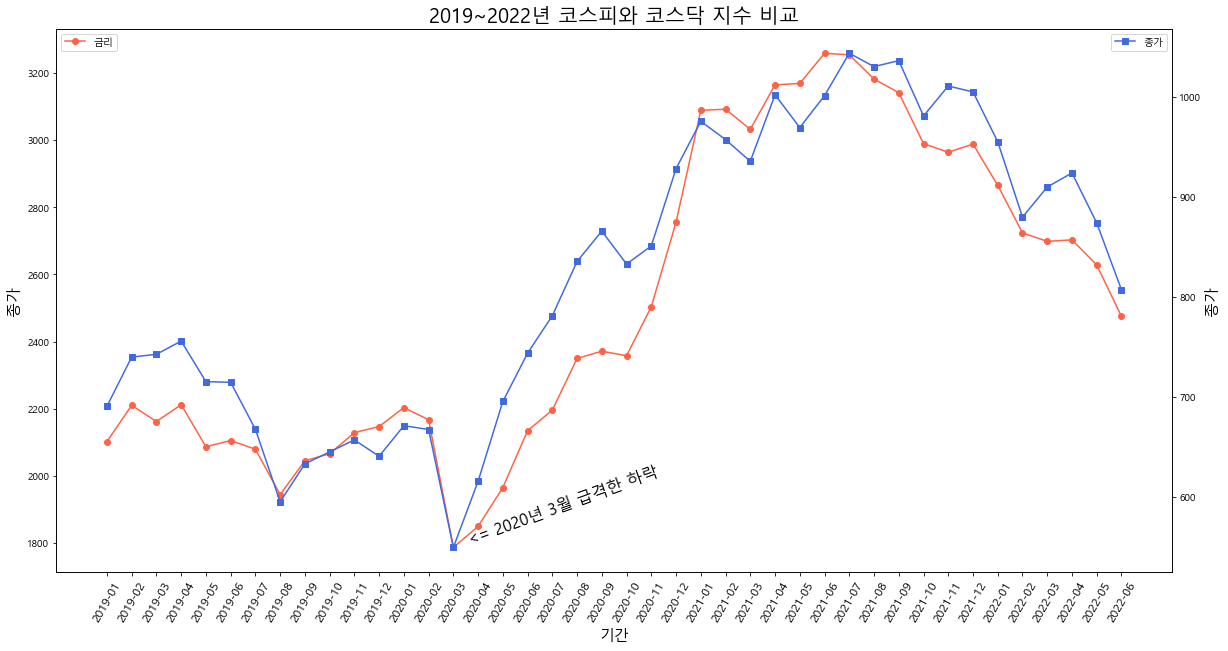

In [238]:
compare_draw_graph(kospiDF_total_mean,kosdaqDF_total_mean,'코스피','코스닥')

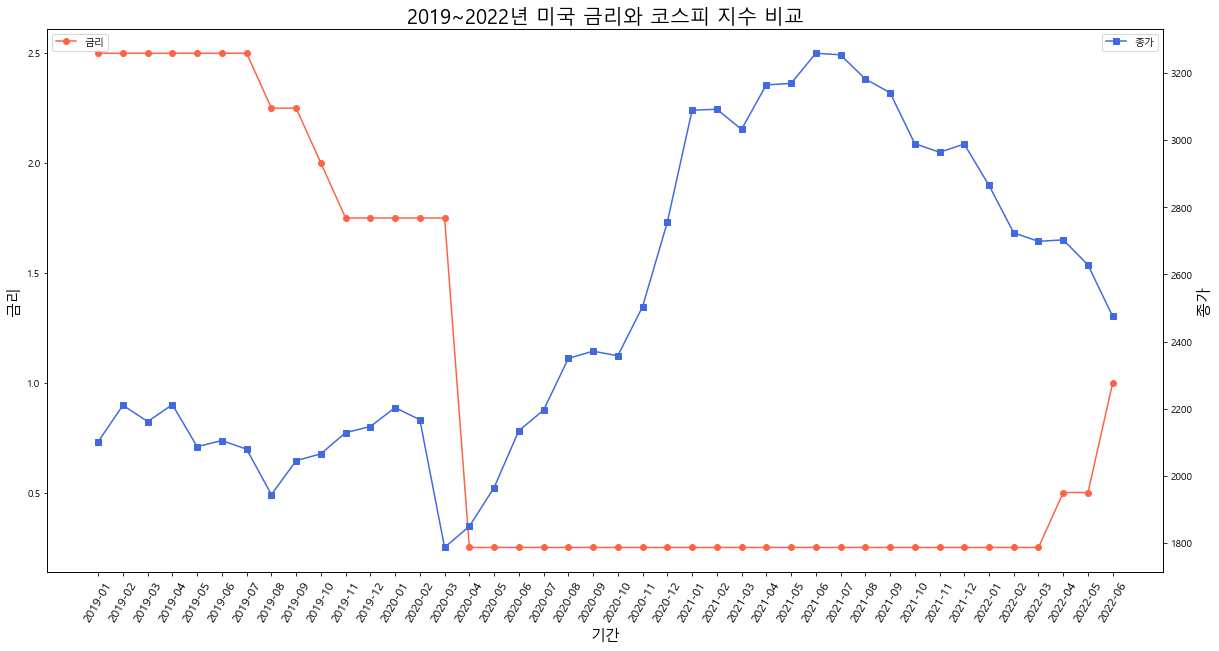

In [184]:
compare_draw_graph(amDF_total,kospiDF_total_mean,'미국 금리','코스피')

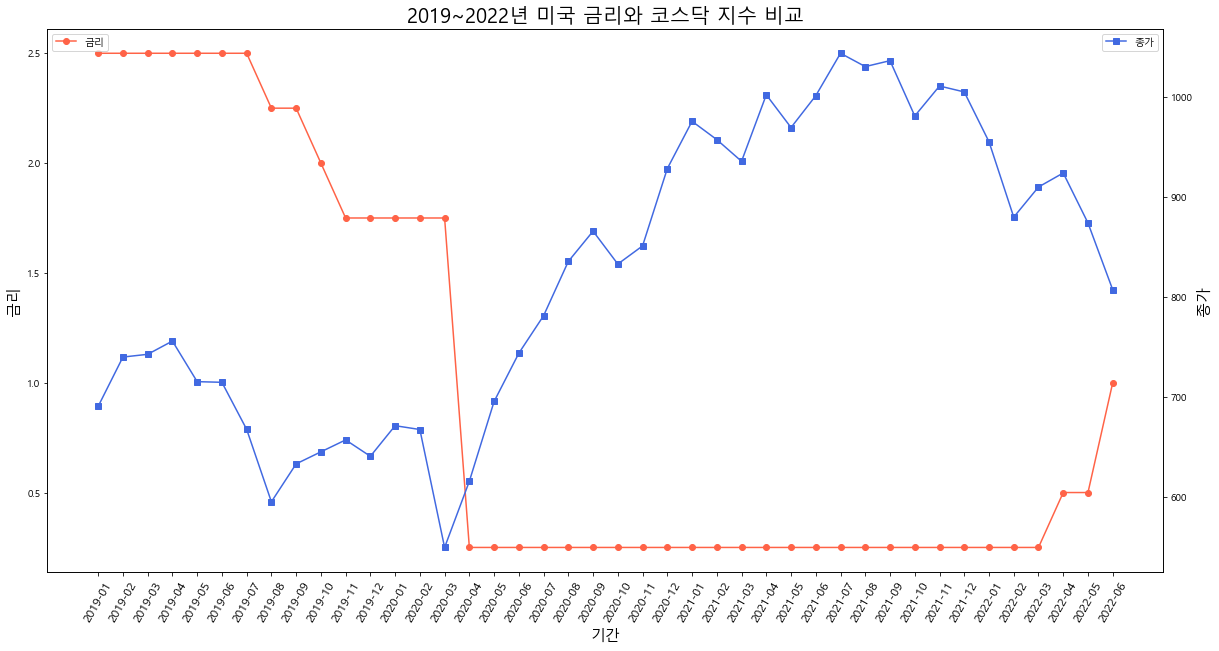

In [185]:
compare_draw_graph(amDF_total,kosdaqDF_total_mean,'미국 금리','코스닥')